# SpaceX Falcon 9 first stage Landing Prediction

## Collecting the data

In this project, we will predict if the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because SpaceX can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against SpaceX for a rocket launch


Import Libraries and Define Auxiliary Functions

In [55]:
# Requests allows us to make HTTP requests which we will use to get data from an API
import requests
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Datetime is a library that allows us to represent dates
import datetime
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
# Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

# Setting this option will print all collumns of a dataframe
pd.set_option('display.max_columns', None)
# Setting this option will print all of the data in a feature
pd.set_option('display.max_colwidth', None)

defining a series of helper functions that will help us use the API to extract information using identification numbers in the launch data.

#From the rocket column we would like to learn the booster name.

In [2]:
# Takes the dataset and uses the rocket column to call the API and append the data to the list
def getBoosterVersion(data):
    for x in data['rocket']:
        response = requests.get("https://api.spacexdata.com/v4/rockets/"+str(x)).json()
        BoosterVersion.append(response['name'])

From the launchpad we would like to know the name of the launch site being used, the logitude, and the latitude.

In [3]:
# Takes the dataset and uses the launchpad column to call the API and append the data to the list
def getLaunchSite(data):
    for x in data['launchpad']:
        response = requests.get("https://api.spacexdata.com/v4/launchpads/"+str(x)).json()
        Longitude.append(response['longitude'])
        Latitude.append(response['latitude'])
        LaunchSite.append(response['name'])


From the payload we would like to learn the mass of the payload and the orbit that it is going to.

In [4]:
# Takes the dataset and uses the payloads column to call the API and append the data to the lists
def getPayloadData(data):
    for load in data['payloads']:
        response = requests.get("https://api.spacexdata.com/v4/payloads/"+load).json()
        PayloadMass.append(response['mass_kg'])
        Orbit.append(response['orbit'])

From cores we would like to learn the outcome of the landing, the type of the landing, number of flights with that core, whether gridfins were used, wheter the core is reused, wheter legs were used, the landing pad used, the block of the core which is a number used to seperate version of cores, the number of times this specific core has been reused, and the serial of the core.

In [5]:
# Takes the dataset and uses the cores column to call the API and append the data to the lists
def getCoreData(data):
    for core in data['cores']:
            if core['core'] != None:
                response = requests.get("https://api.spacexdata.com/v4/cores/"+core['core']).json()
                Block.append(response['block'])
                ReusedCount.append(response['reuse_count'])
                Serial.append(response['serial'])
            else:
                Block.append(None)
                ReusedCount.append(None)
                Serial.append(None)
            Outcome.append(str(core['landing_success'])+' '+str(core['landing_type']))
            Flights.append(core['flight'])
            GridFins.append(core['gridfins'])
            Reused.append(core['reused'])
            Legs.append(core['legs'])
            LandingPad.append(core['landpad'])

requesting rocket launch data from SpaceX API with the following URL:

In [6]:
spacex_url="https://api.spacexdata.com/v4/launches/past"

In [7]:

response = requests.get(spacex_url)

print(response.content)

b'[{"fairings":{"reused":false,"recovery_attempt":false,"recovered":false,"ships":[]},"links":{"patch":{"small":"https://images2.imgbox.com/94/f2/NN6Ph45r_o.png","large":"https://images2.imgbox.com/5b/02/QcxHUb5V_o.png"},"reddit":{"campaign":null,"launch":null,"media":null,"recovery":null},"flickr":{"small":[],"original":[]},"presskit":null,"webcast":"https://www.youtube.com/watch?v=0a_00nJ_Y88","youtube_id":"0a_00nJ_Y88","article":"https://www.space.com/2196-spacex-inaugural-falcon-1-rocket-lost-launch.html","wikipedia":"https://en.wikipedia.org/wiki/DemoSat"},"static_fire_date_utc":"2006-03-17T00:00:00.000Z","static_fire_date_unix":1142553600,"net":false,"window":0,"rocket":"5e9d0d95eda69955f709d1eb","success":false,"failures":[{"time":33,"altitude":null,"reason":"merlin engine failure"}],"details":"Engine failure at 33 seconds and loss of vehicle","crew":[],"ships":[],"capsules":[],"payloads":["5eb0e4b5b6c3bb0006eeb1e1"],"launchpad":"5e9e4502f5090995de566f86","flight_number":1,"name

decode the response content as a Json using .json() and turn it into a Pandas dataframe using .json_normalize()

In [9]:
# Use json_normalize method to convert the json result into a dataframe

# decode response content as json
static_json_df = response.json()

In [10]:
# apply json_normalize
data = pd.json_normalize(static_json_df)

In [11]:

# Get the head of the dataframe
data.head(5)

,static_fire_date_utc,static_fire_date_unix,net,window,rocket,success,failures,details,crew,ships,capsules,payloads,launchpad,flight_number,name,date_utc,date_unix,date_local,date_precision,upcoming,cores,auto_update,tbd,launch_library_id,id,fairings.reused,fairings.recovery_attempt,fairings.recovered,fairings.ships,links.patch.small,links.patch.large,links.reddit.campaign,links.reddit.launch,links.reddit.media,links.reddit.recovery,links.flickr.small,links.flickr.original,links.presskit,links.webcast,links.youtube_id,links.article,links.wikipedia,fairings
0,2006-03-17T00:00:00.000Z,1.142554e+09,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 33, 'altitude': None, 'reason': 'merlin engine failure'}]",Engine failure at 33 seconds and loss of vehicle,[],[],[],[5eb0e4b5b6c3bb0006eeb1e1],5e9e4502f5090995de566f86,1,FalconSat,2006-03-24T22:30:00.000Z,1143239400,2006-03-25T10:30:00+12:00,hour,False,"[{'core': '5e9e289df35918033d3b2623', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]",True,False,None,5eb87cd9ffd86e000604b32a,False,False,False,[],https://images2.imgbox.com/94/f2/NN6Ph45r_o.png,https://images2.imgbox.com/5b/02/QcxHUb5V_o.png,None,None,None,None,[],[],None,https://www.youtube.com/watch?v=0a_00nJ_Y88,0a_00nJ_Y88,https://www.space.com/2196-spacex-inaugural-falcon-1-rocket-lost-launch.html,https://en.wikipedia.org/wiki/DemoSat,NaN
1,None,NaN,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 301, 'altitude': 289, 'reason': 'harmonic oscillation leading to premature engine shutdown'}]","Successful first stage burn and transition to second stage, maximum altitude 289 km, Premature engine shutdown at T+7 min 30 s, Failed to reach orbit, Failed to recover first stage",[],[],[],[5eb0e4b6b6c3bb0006eeb1e2],5e9e4502f5090995de566f86,2,DemoSat,2007-03-21T01:10:00.000Z,1174439400,2007-03-21T13:10:00+12:00,hour,False,"[{'core': '5e9e289ef35918416a3b2624', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]",True,False,None,5eb87cdaffd86e000604b32b,False,False,False,[],https://images2.imgbox.com/f9/4a/ZboXReNb_o.png,https://images2.imgbox.com/80/a2/bkWotCIS_o.png,None,None,None,None,[],[],None,https://www.youtube.com/watch?v=Lk4zQ2wP-Nc,Lk4zQ2wP-Nc,https://www.space.com/3590-spacex-falcon-1-rocket-fails-reach-orbit.html,https://en.wikipedia.org/wiki/DemoSat,NaN
2,None,NaN,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 140, 'altitude': 35, 'reason': 'residual stage-1 thrust led to collision between stage 1 and stage 2'}]",Residual stage 1 thrust led to collision between stage 1 and stage 2,[],[],[],"[5eb0e4b6b6c3bb0006eeb1e3, 5eb0e4b6b6c3bb0006eeb1e4]",5e9e4502f5090995de566f86,3,Trailblazer,2008-08-03T03:34:00.000Z,1217734440,2008-08-03T15:34:00+12:00,hour,False,"[{'core': '5e9e289ef3591814873b2625', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]",True,False,None,5eb87cdbffd86e000604b32c,False,False,False,[],https://images2.imgbox.com/6c/cb/na1tzhHs_o.png,https://images2.imgbox.com/4a/80/k1oAkY0k_o.png,None,None,None,None,[],[],None,https://www.youtube.com/watch?v=v0w9p3U8860,v0w9p3U8860,http://www.spacex.com/news/2013/02/11/falcon-1-flight-3-mission-summary,https://en.wikipedia.org/wiki/Trailblazer_(satellite),NaN
3,2008-09-20T00:00:00.000Z,1.221869e+09,False,0.0,5e9d0d95eda69955f709d1eb,True,[],"Ratsat was carried to orbit on the first successful orbital launch of any privately funded and developed, liquid-propelled carrier rocket, the SpaceX Falcon 1",[],[],[],[5eb0e4b7b6c3bb0006eeb1e5],5e9e4502f5090995de566f86,4,RatSat,2008-09-28T23:15:00.000Z,1222643700,2008-09-28T11:15:00+12:00,hour,False,"[{'core': '5e9e289ef3591855dc3b2626', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': 

a lot of the data are IDs. For example the rocket column has no information about the rocket just an identification number.

We will now use the API again to get information about the launches using the IDs given for each launch. Specifically we will be using columns rocket, payloads, launchpad, and cores.

In [12]:
# Lets take a subset of our dataframe keeping only the features we want and the flight number, and date_utc.
data = data[['rocket', 'payloads', 'launchpad', 'cores', 'flight_number', 'date_utc']]

# We will remove rows with multiple cores because those are falcon rockets with 2 extra rocket boosters and rows that have multiple payloads in a single rocket.
data = data[data['cores'].map(len)==1]
data = data[data['payloads'].map(len)==1]

# Since payloads and cores are lists of size 1 we will also extract the single value in the list and replace the feature.
data['cores'] = data['cores'].map(lambda x : x[0])
data['payloads'] = data['payloads'].map(lambda x : x[0])

# We also want to convert the date_utc to a datetime datatype and then extracting the date leaving the time
data['date'] = pd.to_datetime(data['date_utc']).dt.date

# Using the date we will restrict the dates of the launches
data = data[data['date'] <= datetime.date(2020, 11, 13)]

* From the rocket we would like to learn the booster name

* From the payload we would like to learn the mass of the payload and the orbit that it is going to

* From the launchpad we would like to know the name of the launch site being used, the longitude, and the latitude.

* From cores we would like to learn the outcome of the landing, the type of the landing, number of flights with that core, whether gridfins were used, whether the core is reused, whether legs were used, the landing pad used, the block of the core which is a number used to seperate version of cores, the number of times this specific core has been reused, and the serial of the core.

The data from these requests will be stored in lists and will be used to create a new dataframe.

In [13]:
#Global variables 
BoosterVersion = []
PayloadMass = []
Orbit = []
LaunchSite = []
Outcome = []
Flights = []
GridFins = []
Reused = []
Legs = []
LandingPad = []
Block = []
ReusedCount = []
Serial = []
Longitude = []
Latitude = []

These functions will apply the outputs globally to the above variables.

apply  getBoosterVersion function method to get the booster version

In [14]:

# Call getBoosterVersion
getBoosterVersion(data)

In [15]:

BoosterVersion[0:5]

['Falcon 1', 'Falcon 1', 'Falcon 1', 'Falcon 1', 'Falcon 9']

In [16]:

# Call getLaunchSite
getLaunchSite(data)

In [17]:

# Call getPayloadData
getPayloadData(data)

In [18]:

# Call getCoreData
getCoreData(data)

construct our dataset using the data we have obtained. Combine the columns into a dictionary.

In [19]:
launch_dict = {'FlightNumber': list(data['flight_number']),
'Date': list(data['date']),
'BoosterVersion':BoosterVersion,
'PayloadMass':PayloadMass,
'Orbit':Orbit,
'LaunchSite':LaunchSite,
'Outcome':Outcome,
'Flights':Flights,
'GridFins':GridFins,
'Reused':Reused,
'Legs':Legs,
'LandingPad':LandingPad,
'Block':Block,
'ReusedCount':ReusedCount,
'Serial':Serial,
'Longitude': Longitude,
'Latitude': Latitude}

create a Pandas data frame from the dictionary launch_dict.

In [20]:
# Create a data from launch_dict
launch_df = pd.DataFrame([launch_dict])

In [21]:
# Show the head of the dataframe
launch_df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,"[1, 2, 4, 5, 6, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 57, 58, 59, 60, 61, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 76, 78, 79, 80, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 100, 101, 102, 103, 104, 105, 106]","[2006-03-24, 2007-03-21, 2008-09-28, 2009-07-13, 2010-06-04, 2012-05-22, 2013-03-01, 2013-09-29, 2013-12-03, 2014-01-06, 2014-04-18, 2014-07-14, 2014-08-05, 2014-09-07, 2014-09-21, 2015-01-10, 2015-02-11, 2015-04-14, 2015-04-27, 2015-06-28, 2015-12-22, 2016-01-17, 2016-03-04, 2016-04-08, 2016-05-06, 2016-05-27, 2016-07-18, 2016-08-14, 2016-09-01, 2017-01-14, 2017-02-19, 2017-03-16, 2017-03-30, 2017-05-01, 2017-05-15, 2017-06-03, 2017-06-23, 2017-06-25, 2017-07-05, 2017-08-14, 2017-08-24, 2017-09-07, 2017-10-09, 2017-10-11, 2017-10-30, 2017-12-15, 2017-12-23, 2018-01-08, 2018-01-31, 2018-03-06, 2018-03-30, 2018-04-02, 2018-04-18, 2018-05-11, 2018-06-04, 2018-06-29, 2018-07-22, 2018-07-25, 2018-08-07, 2018-09-10, 2018-10-08, 2018-11-15, 2018-12-03, 2018-12-05, 2018-12-23, 2019-01-11, 2019-03-02, 2019-05-04, 2019-05-24, 2019-06-12, 2019-07-25, 2019-08-06, 2019-11-11, 2019-12-05, 2019-12-17, 2020-01-07, 2020-01-19, 2020-01-29, 2020-02-17, 2020-03-07, 2020-03-18, 2020-04-22, 2020-05-30, 2020-06-04, 2020-06-13, 2020-06-30, 2020-07-20, 2020-08-18, 2020-08-30, 2020-09-03, 2020-10-06, 2020-10-18, 2020-10-24, 2020-11-05]","[Falcon 1, Falcon 1, Falcon 1, Falcon 1, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9]","[20, None, 165, 200, None, 525, 677, 500, 3170, 3325, 2296, 1316, 4535, 4428, 2216, 2395, 570, 1898, 4707, 2477, 2034, 553, 5271, 3136, 4696, 3100, 2257, 4600, 5500, 9600, 2490, 5600, 5300, None, 6070, 2708, 3669, 9600, 6761, 2910, 475, 4990, 9600, 5200, 3700, 2205, 9600, None, 4230, 6092, 9600, 2760, 350, 3750, 5383.85, 2410, 7076, 9600, 5800, 7060, 2800, 3000, 4000, 2573, 4400, 9600, 12259, 2482, 13200, 1425, 2227.7, 6500, 15600, 5000, 6800, 15600, None, 15600, 15600, 1977, 15600, 15600, 9525, 15600, 15600, 3880, None, 15600, 1600, 15600, 15600, 15600, 15600, 3681]","[LEO, LEO, LEO, LEO, LEO, LEO, ISS, PO, GTO, GTO, ISS, LEO, GTO, GTO, ISS, ISS, ES-L1, ISS, GTO, ISS, LEO, PO, GTO, ISS, GTO, GTO, ISS, GTO, GTO, PO, ISS, GTO, GTO, LEO, GTO, ISS, GTO, PO, GTO, ISS, SSO, LEO, PO, GTO, GTO, ISS, PO, LEO, GTO, GTO, PO, ISS, HEO, GTO, GTO, ISS, GTO, PO, GTO, GTO, SSO, GTO, SSO, ISS, MEO, PO, ISS, ISS, VLEO, SSO, ISS, GTO, VLEO, ISS, GTO, VLEO, SO, VLEO, VLEO, ISS, VLEO, VLEO, ISS, VLEO, VLEO, MEO, GEO, VLEO, SSO, VLEO, VLEO, VLEO, VLEO, MEO]","[Kwajalein Atoll, Kwajalein Atoll, Kwajalein Atoll, Kwajalein Atoll, CCSFS SLC 40, CCSFS SLC 40, CCSFS SLC 40, VAFB SLC 4E, CCSFS SLC 40, CCSFS SLC 40, CCSFS SLC 40, CCSFS SLC 40, CCSFS SLC 40, CCSFS SLC 40, CCSFS SLC 40, CCSFS SLC 40, CCSFS SLC 40, CCSFS SLC 40, CCSFS SLC 40, CCSFS SLC 40, CCSFS SLC 40, VAFB SLC 4E, CCSFS SLC 40, 

## Filter the dataframe to only include Falcon 9 launches

we will remove the Falcon 1 launches keeping only the Falcon 9 launches. Filter the data dataframe using the BoosterVersion column to only keep the Falcon 9 launches. Save filtered data to a new dataframe called data_falcon9

In [22]:
data_falcon9 = launch_df[launch_df['BoosterVersion'] != 'Falcon 1']
data_falcon9

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,"[1, 2, 4, 5, 6, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 57, 58, 59, 60, 61, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 76, 78, 79, 80, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 100, 101, 102, 103, 104, 105, 106]","[2006-03-24, 2007-03-21, 2008-09-28, 2009-07-13, 2010-06-04, 2012-05-22, 2013-03-01, 2013-09-29, 2013-12-03, 2014-01-06, 2014-04-18, 2014-07-14, 2014-08-05, 2014-09-07, 2014-09-21, 2015-01-10, 2015-02-11, 2015-04-14, 2015-04-27, 2015-06-28, 2015-12-22, 2016-01-17, 2016-03-04, 2016-04-08, 2016-05-06, 2016-05-27, 2016-07-18, 2016-08-14, 2016-09-01, 2017-01-14, 2017-02-19, 2017-03-16, 2017-03-30, 2017-05-01, 2017-05-15, 2017-06-03, 2017-06-23, 2017-06-25, 2017-07-05, 2017-08-14, 2017-08-24, 2017-09-07, 2017-10-09, 2017-10-11, 2017-10-30, 2017-12-15, 2017-12-23, 2018-01-08, 2018-01-31, 2018-03-06, 2018-03-30, 2018-04-02, 2018-04-18, 2018-05-11, 2018-06-04, 2018-06-29, 2018-07-22, 2018-07-25, 2018-08-07, 2018-09-10, 2018-10-08, 2018-11-15, 2018-12-03, 2018-12-05, 2018-12-23, 2019-01-11, 2019-03-02, 2019-05-04, 2019-05-24, 2019-06-12, 2019-07-25, 2019-08-06, 2019-11-11, 2019-12-05, 2019-12-17, 2020-01-07, 2020-01-19, 2020-01-29, 2020-02-17, 2020-03-07, 2020-03-18, 2020-04-22, 2020-05-30, 2020-06-04, 2020-06-13, 2020-06-30, 2020-07-20, 2020-08-18, 2020-08-30, 2020-09-03, 2020-10-06, 2020-10-18, 2020-10-24, 2020-11-05]","[Falcon 1, Falcon 1, Falcon 1, Falcon 1, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9]","[20, None, 165, 200, None, 525, 677, 500, 3170, 3325, 2296, 1316, 4535, 4428, 2216, 2395, 570, 1898, 4707, 2477, 2034, 553, 5271, 3136, 4696, 3100, 2257, 4600, 5500, 9600, 2490, 5600, 5300, None, 6070, 2708, 3669, 9600, 6761, 2910, 475, 4990, 9600, 5200, 3700, 2205, 9600, None, 4230, 6092, 9600, 2760, 350, 3750, 5383.85, 2410, 7076, 9600, 5800, 7060, 2800, 3000, 4000, 2573, 4400, 9600, 12259, 2482, 13200, 1425, 2227.7, 6500, 15600, 5000, 6800, 15600, None, 15600, 15600, 1977, 15600, 15600, 9525, 15600, 15600, 3880, None, 15600, 1600, 15600, 15600, 15600, 15600, 3681]","[LEO, LEO, LEO, LEO, LEO, LEO, ISS, PO, GTO, GTO, ISS, LEO, GTO, GTO, ISS, ISS, ES-L1, ISS, GTO, ISS, LEO, PO, GTO, ISS, GTO, GTO, ISS, GTO, GTO, PO, ISS, GTO, GTO, LEO, GTO, ISS, GTO, PO, GTO, ISS, SSO, LEO, PO, GTO, GTO, ISS, PO, LEO, GTO, GTO, PO, ISS, HEO, GTO, GTO, ISS, GTO, PO, GTO, GTO, SSO, GTO, SSO, ISS, MEO, PO, ISS, ISS, VLEO, SSO, ISS, GTO, VLEO, ISS, GTO, VLEO, SO, VLEO, VLEO, ISS, VLEO, VLEO, ISS, VLEO, VLEO, MEO, GEO, VLEO, SSO, VLEO, VLEO, VLEO, VLEO, MEO]","[Kwajalein Atoll, Kwajalein Atoll, Kwajalein Atoll, Kwajalein Atoll, CCSFS SLC 40, CCSFS SLC 40, CCSFS SLC 40, VAFB SLC 4E, CCSFS SLC 40, CCSFS SLC 40, CCSFS SLC 40, CCSFS SLC 40, CCSFS SLC 40, CCSFS SLC 40, CCSFS SLC 40, CCSFS SLC 40, CCSFS SLC 40, CCSFS SLC 40, CCSFS SLC 40, CCSFS SLC 40, CCSFS SLC 40, VAFB SLC 4E, CCSFS SLC 40, 

Now that we have removed some values we should reset the FlgihtNumber column

In [23]:
data_falcon9.loc[:,'FlightNumber'] = list(range(1, data_falcon9.shape[0]+1))
data_falcon9

C:\Users\LEGION\AppData\Local\Temp\ipykernel_16792\4023201451.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_falcon9.loc[:,'FlightNumber'] = list(range(1, data_falcon9.shape[0]+1))


,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,1,"[2006-03-24, 2007-03-21, 2008-09-28, 2009-07-13, 2010-06-04, 2012-05-22, 2013-03-01, 2013-09-29, 2013-12-03, 2014-01-06, 2014-04-18, 2014-07-14, 2014-08-05, 2014-09-07, 2014-09-21, 2015-01-10, 2015-02-11, 2015-04-14, 2015-04-27, 2015-06-28, 2015-12-22, 2016-01-17, 2016-03-04, 2016-04-08, 2016-05-06, 2016-05-27, 2016-07-18, 2016-08-14, 2016-09-01, 2017-01-14, 2017-02-19, 2017-03-16, 2017-03-30, 2017-05-01, 2017-05-15, 2017-06-03, 2017-06-23, 2017-06-25, 2017-07-05, 2017-08-14, 2017-08-24, 2017-09-07, 2017-10-09, 2017-10-11, 2017-10-30, 2017-12-15, 2017-12-23, 2018-01-08, 2018-01-31, 2018-03-06, 2018-03-30, 2018-04-02, 2018-04-18, 2018-05-11, 2018-06-04, 2018-06-29, 2018-07-22, 2018-07-25, 2018-08-07, 2018-09-10, 2018-10-08, 2018-11-15, 2018-12-03, 2018-12-05, 2018-12-23, 2019-01-11, 2019-03-02, 2019-05-04, 2019-05-24, 2019-06-12, 2019-07-25, 2019-08-06, 2019-11-11, 2019-12-05, 2019-12-17, 2020-01-07, 2020-01-19, 2020-01-29, 2020-02-17, 2020-03-07, 2020-03-18, 2020-04-22, 2020-05-30, 2020-06-04, 2020-06-13, 2020-06-30, 2020-07-20, 2020-08-18, 2020-08-30, 2020-09-03, 2020-10-06, 2020-10-18, 2020-10-24, 2020-11-05]","[Falcon 1, Falcon 1, Falcon 1, Falcon 1, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9]","[20, None, 165, 200, None, 525, 677, 500, 3170, 3325, 2296, 1316, 4535, 4428, 2216, 2395, 570, 1898, 4707, 2477, 2034, 553, 5271, 3136, 4696, 3100, 2257, 4600, 5500, 9600, 2490, 5600, 5300, None, 6070, 2708, 3669, 9600, 6761, 2910, 475, 4990, 9600, 5200, 3700, 2205, 9600, None, 4230, 6092, 9600, 2760, 350, 3750, 5383.85, 2410, 7076, 9600, 5800, 7060, 2800, 3000, 4000, 2573, 4400, 9600, 12259, 2482, 13200, 1425, 2227.7, 6500, 15600, 5000, 6800, 15600, None, 15600, 15600, 1977, 15600, 15600, 9525, 15600, 15600, 3880, None, 15600, 1600, 15600, 15600, 15600, 15600, 3681]","[LEO, LEO, LEO, LEO, LEO, LEO, ISS, PO, GTO, GTO, ISS, LEO, GTO, GTO, ISS, ISS, ES-L1, ISS, GTO, ISS, LEO, PO, GTO, ISS, GTO, GTO, ISS, GTO, GTO, PO, ISS, GTO, GTO, LEO, GTO, ISS, GTO, PO, GTO, ISS, SSO, LEO, PO, GTO, GTO, ISS, PO, LEO, GTO, GTO, PO, ISS, HEO, GTO, GTO, ISS, GTO, PO, GTO, GTO, SSO, GTO, SSO, ISS, MEO, PO, ISS, ISS, VLEO, SSO, ISS, GTO, VLEO, ISS, GTO, VLEO, SO, VLEO, VLEO, ISS, VLEO, VLEO, ISS, VLEO, VLEO, MEO, GEO, VLEO, SSO, VLEO, VLEO, VLEO, VLEO, MEO]","[Kwajalein Atoll, Kwajalein Atoll, Kwajalein Atoll, Kwajalein Atoll, CCSFS SLC 40, CCSFS SLC 40, CCSFS SLC 40, VAFB SLC 4E, CCSFS SLC 40, CCSFS SLC 40, CCSFS SLC 40, CCSFS SLC 40, CCSFS SLC 40, CCSFS SLC 40, CCSFS SLC 40, CCSFS SLC 40, CCSFS SLC 40, CCSFS SLC 40, CCSFS SLC 40, CCSFS SLC 40, CCSFS SLC 40, VAFB SLC 4E, CCSFS SLC 40, CCSFS SLC 40, CCSFS SLC 40, CCSFS SLC 40, CCSFS SLC 40, CCSFS SLC 40, CCSFS SLC 40, VAFB SLC 4E, KSC LC 39A, KSC LC 39A, KSC LC 39A, KSC LC 39A, KSC LC 39A, KSC LC 39A, KSC LC 39A, VAFB SLC 4E, KSC LC 39A, KSC LC 39A, VAFB SLC 4E, KSC LC 39A, VAFB SLC 4E, KSC LC 39A, KSC LC 39A, CCSFS SLC 40, VAFB SLC 4E, CCSFS SLC 40, CCSFS SLC 40, CCSFS SLC 40, VAFB SLC 4E, CCSFS SLC 40, CC

## Data Wrangling

In [24]:
data_falcon9.isnull().sum()

FlightNumber      0
Date              0
BoosterVersion    0
PayloadMass       0
Orbit             0
LaunchSite        0
Outcome           0
Flights           0
GridFins          0
Reused            0
Legs              0
LandingPad        0
Block             0
ReusedCount       0
Serial            0
Longitude         0
Latitude          0
dtype: int64

no missing values in our dataset

In [25]:

# save and export new dataset
data_falcon9.to_csv('dataset_part_1.csv', index=False)

# Web scraping Falcon 9 and Falcon Heavy Launches Records from Wikipedia

collect Falcon 9 historical launch records from a Wikipedia page titled List of Falcon 9 and Falcon Heavy launches: https://en.wikipedia.org/wiki/List_of_Falcon\_9\_and_Falcon_Heavy_launches

* Objective

Web scrap Falcon 9 launch records with BeautifulSoup:

Extract a Falcon 9 launch records HTML table from Wikipedia

Parse the table and convert it into a Pandas data frame

In [26]:
import sys

import requests
from bs4 import BeautifulSoup
import re
import unicodedata
import pandas as pd
import warnings

we will provide some helper functions for you to process web scraped HTML table

In [27]:
def date_time(table_cells):
    """
    This function returns the data and time from the HTML  table cell
    Input: the  element of a table data cell extracts extra row
    """
    return [data_time.strip() for data_time in list(table_cells.strings)][0:2]

def booster_version(table_cells):
    """
    This function returns the booster version from the HTML  table cell 
    Input: the  element of a table data cell extracts extra row
    """
    out=''.join([booster_version for i,booster_version in enumerate( table_cells.strings) if i%2==0][0:-1])
    return out

def landing_status(table_cells):
    """
    This function returns the landing status from the HTML table cell 
    Input: the  element of a table data cell extracts extra row
    """
    out=[i for i in table_cells.strings][0]
    return out


def get_mass(table_cells):
    mass=unicodedata.normalize("NFKD", table_cells.text).strip()
    if mass:
        mass.find("kg")
        new_mass=mass[0:mass.find("kg")+2]
    else:
        new_mass=0
    return new_mass


def extract_column_from_header(row):
    """
    This function returns the landing status from the HTML table cell 
    Input: the  element of a table data cell extracts extra row
    """
    if (row.br):
        row.br.extract()
    if row.a:
        row.a.extract()
    if row.sup:
        row.sup.extract()
        
    colunm_name = ' '.join(row.contents)
    
    # Filter the digit and empty names
    if not(colunm_name.strip().isdigit()):
        colunm_name = colunm_name.strip()
        return colunm_name   

To keep the lab tasks consistent, you will be asked to scrape the data from a snapshot of the  `List of Falcon 9 and Falcon Heavy launches` Wikipage updated on
`9th June 2021`

In [28]:
static_url = "https://en.wikipedia.org/w/index.php?title=List_of_Falcon_9_and_Falcon_Heavy_launches&oldid=1027686922"

request the HTML page from the above URL and get a response object

### TASK 1: Request the Falcon9 Launch Wiki page from its URL

perform an HTTP GET method to request the Falcon9 Launch HTML page, as an HTTP response.

In [29]:
# using requests.get() method with the provided static_url
# assigning the response to a object
html_data = requests.get(static_url)
html_data.status_code

200

Creating a BeautifulSoup object from the HTML response

In [30]:
#BeautifulSoup() to create a BeautifulSoup object from a response text content
soup = BeautifulSoup(html_data.text, 'html.parser')

In [31]:
soup.title

<title>List of Falcon 9 and Falcon Heavy launches - Wikipedia</title>

### TASK 2: Extract all column/variable names from the HTML table header


we want to collect all relevant column names from the HTML table header

In [32]:
# Using the find_all function in the BeautifulSoup object, with element type `table`
# Assign the result to a list called `html_tables`
html_tables = soup.find_all('table')

Starting from the third table is our target table contains the actual launch records.


In [33]:
# print the third table and check its content
first_launch_table = html_tables[2]
print(first_launch_table)

<table class="wikitable plainrowheaders collapsible" style="width: 100%;">
<tbody><tr>
<th scope="col">Flight No.
</th>
<th scope="col">Date and<br/>time (<a href="/wiki/Coordinated_Universal_Time" title="Coordinated Universal Time">UTC</a>)
</th>
<th scope="col"><a href="/wiki/List_of_Falcon_9_first-stage_boosters" title="List of Falcon 9 first-stage boosters">Version,<br/>Booster</a> <sup class="reference" id="cite_ref-booster_11-0"><a href="#cite_note-booster-11"><span class="cite-bracket">[</span>b<span class="cite-bracket">]</span></a></sup>
</th>
<th scope="col">Launch site
</th>
<th scope="col">Payload<sup class="reference" id="cite_ref-Dragon_12-0"><a href="#cite_note-Dragon-12"><span class="cite-bracket">[</span>c<span class="cite-bracket">]</span></a></sup>
</th>
<th scope="col">Payload mass
</th>
<th scope="col">Orbit
</th>
<th scope="col">Customer
</th>
<th scope="col">Launch<br/>outcome
</th>
<th scope="col"><a href="/wiki/Falcon_9_first-stage_landing_tests" title="Falcon 

iterate through the <th> elements and apply the extract_column_from_header() to extract column name one by one

In [34]:
column_names = []

# Applying find_all() function with `th` element on first_launch_table
# Iterating each th element and applying the provided extract_column_from_header() to get column name
# Appending the Non-empty column name into a list called column_names

element = soup.find_all('th')
for row in range(len(element)):
    try:
        name = extract_column_from_header(element[row])
        if (name is not None and len(name) > 0):
            column_names.append(name)
    except:
        pass

In [35]:
print(column_names)

['Flight No.', 'Date and time ( )', 'Launch site', 'Payload', 'Payload mass', 'Orbit', 'Customer', 'Launch outcome', 'Flight No.', 'Date and time ( )', 'Launch site', 'Payload', 'Payload mass', 'Orbit', 'Customer', 'Launch outcome', 'Flight No.', 'Date and time ( )', 'Launch site', 'Payload', 'Payload mass', 'Orbit', 'Customer', 'Launch outcome', 'Flight No.', 'Date and time ( )', 'Launch site', 'Payload', 'Payload mass', 'Orbit', 'Customer', 'Launch outcome', 'N/A', 'Flight No.', 'Date and time ( )', 'Launch site', 'Payload', 'Payload mass', 'Orbit', 'Customer', 'Launch outcome', 'Flight No.', 'Date and time ( )', 'Launch site', 'Payload', 'Payload mass', 'Orbit', 'Customer', 'Launch outcome', 'Flight No.', 'Date and time ( )', 'Launch site', 'Payload', 'Payload mass', 'Orbit', 'Customer', 'Launch outcome', 'FH 2', 'FH 3', 'Flight No.', 'Date and time ( )', 'Launch site', 'Payload', 'Payload mass', 'Orbit', 'Customer', 'Launch outcome', 'Date and time ( )', 'Launch site', 'Payload', '

## TASK 3: Create a data frame by parsing the launch HTML tables

creating an empty dictionary with keys from the extracted column names in the previous task. Later, this dictionary will be converted into a Pandas dataframe

In [36]:
launch_dict= dict.fromkeys(column_names)

# Remove an irrelvant column
del launch_dict['Date and time ( )']

# Let's initial the launch_dict with each value to be an empty list
launch_dict['Flight No.'] = []
launch_dict['Launch site'] = []
launch_dict['Payload'] = []
launch_dict['Payload mass'] = []
launch_dict['Orbit'] = []
launch_dict['Customer'] = []
launch_dict['Launch outcome'] = []
# Added some new columns
launch_dict['Version Booster']=[]
launch_dict['Booster landing']=[]
launch_dict['Date']=[]
launch_dict['Time']=[]

fill up the launch_dict with launch records extracted from table rows.

In [38]:
extracted_row = 0
#Extract each table 
for table_number,table in enumerate(soup.find_all('table',"wikitable plainrowheaders collapsible")):
   # get table row 
    for rows in table.find_all("tr"):
        #check to see if first table heading is as number corresponding to launch a number 
        if rows.th:
            if rows.th.string:
                flight_number=rows.th.string.strip()
                flag=flight_number.isdigit()
        else:
            flag=False
        #get table element 
        row=rows.find_all('td')
        #if it is number save cells in a dictonary 
        if flag:
            extracted_row += 1
            # Flight Number value
            launch_dict['Flight No.'].append(flight_number) 
            #print(flight_number)
            datatimelist=date_time(row[0])
            
            # Date value 
            date = datatimelist[0].strip(',')
            launch_dict['Date'].append(date)
            #print(date)
            
            # Time value
            time = datatimelist[1]
            launch_dict['Time'].append(time)
            #print(time)
              
            # Booster version
            bv=booster_version(row[1])
            if not(bv):
                bv=row[1].a.string
            launch_dict['Version Booster'].append(bv)
            #print(bv)
            
            # Launch Site
            launch_site = row[2].a.string
            launch_dict['Launch site'].append(launch_site)
            #print(launch_site)
            
            # Payload
            payload = row[3].a.string
            launch_dict['Payload'].append(payload)
            #print(payload)
            
            # Payload Mass
            payload_mass = get_mass(row[4])
            launch_dict['Payload mass'].append(payload_mass)
            #print(payload)
            
            # Orbit
            orbit = row[5].a.string
            launch_dict['Orbit'].append(orbit)
            #print(orbit)
            
            # Customer
            if row[6].a:
                customer = row[6].a.string
            else:
                customer = None  # Or some default value if you prefer
            launch_dict['Customer'].append(customer)
            
            # Launch outcome
            launch_outcome = list(row[7].strings)[0]
            launch_dict['Launch outcome'].append(launch_outcome)
            #print(launch_outcome)
            
            # Booster landing
            booster_landing = landing_status(row[8])
            launch_dict['Booster landing'].append(booster_landing)
            #print(booster_landing)

creating a dataframe from it.

In [39]:
headings = []
for key,values in dict(launch_dict).items():
    if key not in headings:
        headings.append(key)
    if values is None:
        del launch_dict[key]

def pad_dict_list(dict_list, padel):
    lmax = 0
    for lname in dict_list.keys():
        lmax = max(lmax, len(dict_list[lname]))
    for lname in dict_list.keys():
        ll = len(dict_list[lname])
        if  ll < lmax:
            dict_list[lname] += [padel] * (lmax - ll)
    return dict_list

pad_dict_list(launch_dict,0)

df = pd.DataFrame(launch_dict)
df.head()

,Flight No.,Launch site,Payload,Payload mass,Orbit,Customer,Launch outcome,Version Booster,Booster landing,Date,Time
0,1,CCAFS,Dragon Spacecraft Qualification Unit,0,LEO,SpaceX,Success\n,F9 v1.07B0003.18,Failure,4 June 2010,18:45
1,2,CCAFS,Dragon,0,LEO,NASA,Success,F9 v1.07B0004.18,Failure,8 December 2010,15:43
2,3,CCAFS,Dragon,525 kg,LEO,NASA,Success,F9 v1.07B0005.18,No attempt\n,22 May 2012,07:44
3,4,CCAFS,SpaceX CRS-1,"4,700 kg",LEO,NASA,Success\n,F9 v1.07B0006.18,No attempt,8 October 2012,00:35
4,5,CCAFS,SpaceX CRS-2,"4,877 kg",LEO,NASA,Success\n,F9 v1.07B0007.18,No attempt\n,1 March 2013,15:10


In [40]:
# export data to csv
df.to_csv('spacex_web_scraped.csv', index=False)

## Data wrangling

we will perform some Exploratory Data Analysis (EDA) to find some patterns in the data and determine what would be the label for training supervised models.

In the data set, there are several different cases where the booster did not land successfully. Sometimes a landing was attempted but failed due to an accident; for example, <code>True Ocean</code> means the mission outcome was successfully  landed to a specific region of the ocean while <code>False Ocean</code> means the mission outcome was unsuccessfully landed to a specific region of the ocean. <code>True RTLS</code> means the mission outcome was successfully  landed to a ground pad <code>False RTLS</code> means the mission outcome was unsuccessfully landed to a ground pad.<code>True ASDS</code> means the mission outcome was successfully landed on  a drone ship <code>False ASDS</code> means the mission outcome was unsuccessfully landed on a drone ship.

we will mainly convert those outcomes into Training Labels with `1` means the booster successfully landed `0` means it was unsuccessful.

## Objectives

*   Perform Exploratory Data Analysis
*   Determine Training Labels

In [41]:
# load the data
df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_1.csv")
df.head(10)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857
5,6,2014-01-06,Falcon 9,3325.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1005,-80.577366,28.561857
6,7,2014-04-18,Falcon 9,2296.000000,ISS,CCAFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1006,-80.577366,28.561857
7,8,2014-07-14,Falcon 9,1316.000000,LEO,CCAFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1007,-80.577366,28.561857
8,9,2014-08-05,Falcon 9,4535.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1008,-80.577366,28.561857
9,10,2014-09-07,Falcon 9,4428.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1011,-80.577366,28.561857


calculate the percentage of the missing values in each attribute

In [42]:
# check for null values
df.isnull().sum()/df.count()*100

FlightNumber       0.000
Date               0.000
BoosterVersion     0.000
PayloadMass        0.000
Orbit              0.000
LaunchSite         0.000
Outcome            0.000
Flights            0.000
GridFins           0.000
Reused             0.000
Legs               0.000
LandingPad        40.625
Block              0.000
ReusedCount        0.000
Serial             0.000
Longitude          0.000
Latitude           0.000
dtype: float64

In [43]:
# check data types
df.dtypes

FlightNumber        int64
Date               object
BoosterVersion     object
PayloadMass       float64
Orbit              object
LaunchSite         object
Outcome            object
Flights             int64
GridFins             bool
Reused               bool
Legs                 bool
LandingPad         object
Block             float64
ReusedCount         int64
Serial             object
Longitude         float64
Latitude          float64
dtype: object

### TASK 1: Calculate the number of launches on each site

The data contains several Space X  launch facilities: Cape Canaveral Space</a> Launch Complex 40  <b>VAFB SLC 4E </b> , Vandenberg Air Force Base Space Launch Complex 4E <b>(SLC-4E)</b>, Kennedy Space Center Launch Complex 39A <b>KSC LC 39A </b>.The location of each Launch Is placed in the column <code>LaunchSite</code>

number of launches for each site.

In [44]:
# Applying value_counts() on column LaunchSite
df['LaunchSite'].value_counts()

CCAFS SLC 40    55
KSC LC 39A      22
VAFB SLC 4E     13
Name: LaunchSite, dtype: int64

*   <b>LEO</b>: Low Earth orbit (LEO)is an Earth-centred orbit with an altitude of 2,000 km (1,200 mi) or less (approximately one-third of the radius of Earth),\[1] or with at least 11.25 periods per day (an orbital period of 128 minutes or less) and an eccentricity less than 0.25.\[2] Most of the manmade objects in outer space are in LEO.

*   <b>VLEO</b>: Very Low Earth Orbits (VLEO) can be defined as the orbits with a mean altitude below 450 km. Operating in these orbits can provide a number of benefits to Earth observation spacecraft as the spacecraft operates closer to the observation.

*   <b>GTO</b> A geosynchronous orbit is a high Earth orbit that allows satellites to match Earth's rotation. Located at 22,236 miles (35,786 kilometers) above Earth's equator, this position is a valuable spot for monitoring weather, communications and surveillance. Because the satellite orbits at the same speed that the Earth is turning, the satellite seems to stay in place over a single longitude, though it may drift north to south,” NASA wrote on its Earth Observatory website.

*   <b>SSO (or SO)</b>: It is a Sun-synchronous orbit  also called a heliosynchronous orbit is a nearly polar orbit around a planet, in which the satellite passes over any given point of the planet's surface at the same local mean solar time.

*   <b>ES-L1 </b>:At the Lagrange points the gravitational forces of the two large bodies cancel out in such a way that a small object placed in orbit there is in equilibrium relative to the center of mass of the large bodies. L1 is one such point between the sun and the earth.

*   <b>HEO</b> A highly elliptical orbit, is an elliptic orbit with high eccentricity, usually referring to one around Earth.

*   <b> ISS </b> A modular space station (habitable artificial satellite) in low Earth orbit. It is a multinational collaborative project between five participating space agencies: NASA (United States), Roscosmos (Russia), JAXA (Japan), ESA (Europe), and CSA (Canada).

*   <b> MEO </b> Geocentric orbits ranging in altitude from 2,000 km (1,200 mi) to just below geosynchronous orbit at 35,786 kilometers (22,236 mi). Also known as an intermediate circular orbit. These are "most commonly at 20,200 kilometers (12,600 mi), or 20,650 kilometers (12,830 mi), with an orbital period of 12 hours.

*   <b> HEO </b> Geocentric orbits above the altitude of geosynchronous orbit (35,786 km or 22,236 mi).

*   <b> GEO </b> It is a circular geosynchronous orbit 35,786 kilometres (22,236 miles) above Earth's equator and following the direction of Earth's rotation.\

*   <b> PO </b> It is one type of satellites in which a satellite passes above or nearly above both poles of the body being orbited (usually a planet such as the Earth.

some are shown in the following plot:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/Orbits.png)

### Calculate the number and occurrence of each orbit

In [46]:
# Applying value_counts on Orbit column
df['Orbit'].value_counts()

GTO      27
ISS      21
VLEO     14
PO        9
LEO       7
SSO       5
MEO       3
ES-L1     1
HEO       1
SO        1
GEO       1
Name: Orbit, dtype: int64

### Calculate the number and occurence of mission outcome per orbit type

In [47]:
# landing_outcomes = values on Outcome column
landing_outcomes = df['Outcome'].value_counts()
landing_outcomes

True ASDS      41
None None      19
True RTLS      14
False ASDS      6
True Ocean      5
False Ocean     2
None ASDS       2
False RTLS      1
Name: Outcome, dtype: int64

<code>True Ocean</code> means the mission outcome was successfully  landed to a specific region of the ocean while <code>False Ocean</code> means the mission outcome was unsuccessfully landed to a specific region of the ocean. <code>True RTLS</code> means the mission outcome was successfully  landed to a ground pad <code>False RTLS</code> means the mission outcome was unsuccessfully landed to a ground pad.<code>True ASDS</code> means the mission outcome was successfully  landed to a drone ship <code>False ASDS</code> means the mission outcome was unsuccessfully landed to a drone ship. <code>None ASDS</code> and <code>None None</code> these represent a failure to land.


In [48]:
for i,outcome in enumerate(landing_outcomes.keys()):
    print(i,outcome)

0 True ASDS
1 None None
2 True RTLS
3 False ASDS
4 True Ocean
5 False Ocean
6 None ASDS
7 False RTLS


We create a set of outcomes where the second stage did not land successfully:

In [49]:
bad_outcomes=set(landing_outcomes.keys()[[1,3,5,6,7]])
bad_outcomes

{'False ASDS', 'False Ocean', 'False RTLS', 'None ASDS', 'None None'}

### Create a landing outcome label from Outcome column

Using the <code>Outcome</code>,  create a list where the element is zero if the corresponding  row  in  <code>Outcome</code> is in the set <code>bad_outcome</code>; otherwise, it's one. Then assigning it to the variable <code>landing_class</code>:

In [50]:
# landing_class = 0 if bad_outcome
# landing_class = 1 otherwise
#landing_class = [x for x in bad_outcomes if df['Outcome'][x] ]

landing_class = []

for key, value in df['Outcome'].items():
    if value in bad_outcomes:
        landing_class.append(0)
    else:
        landing_class.append(1)

This variable will represent the classification variable that represents the outcome of each launch. If the value is zero, the  first stage did not land successfully; one means  the first stage landed Successfully

In [51]:
df['Class']=landing_class
df[['Class']].head(8)

,Class
0,0
1,0
2,0
3,0
4,0
5,0
6,1
7,1


In [52]:
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [53]:
# determine success rate of launch
df["Class"].mean()

0.6666666666666666

In [54]:
# export the data
df.to_csv("dataset_part_2.csv", index=False)

## Exploring and Preparing Data

## Objectives

*   Perform Exploratory Data Analysis

*   Preparing Data  Feature Engineering


## Exploratory Data Analysis


In [56]:
df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")

# If you were unable to complete the previous lab correctly you can uncomment and load this csv

# df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/dataset_part_2.csv')

df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


Try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.

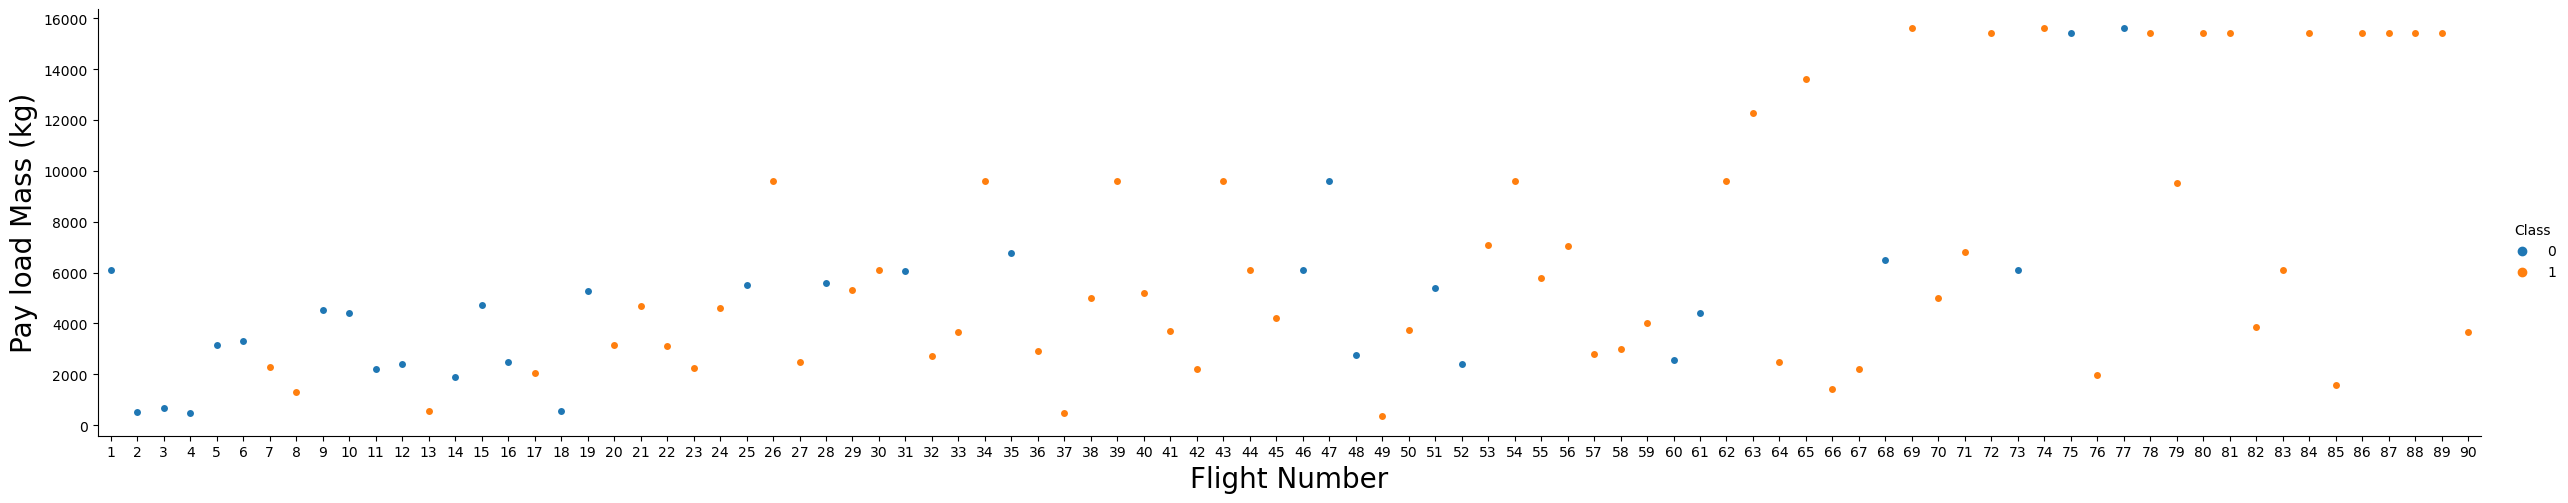

In [57]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

We see that different launch sites have different success rates.  <code>CCAFS LC-40</code>, has a success rate of 60 %, while  <code>KSC LC-39A</code> and <code>VAFB SLC 4E</code> has a success rate of 77%.


### Visualize the relationship between Flight Number and Launch Site

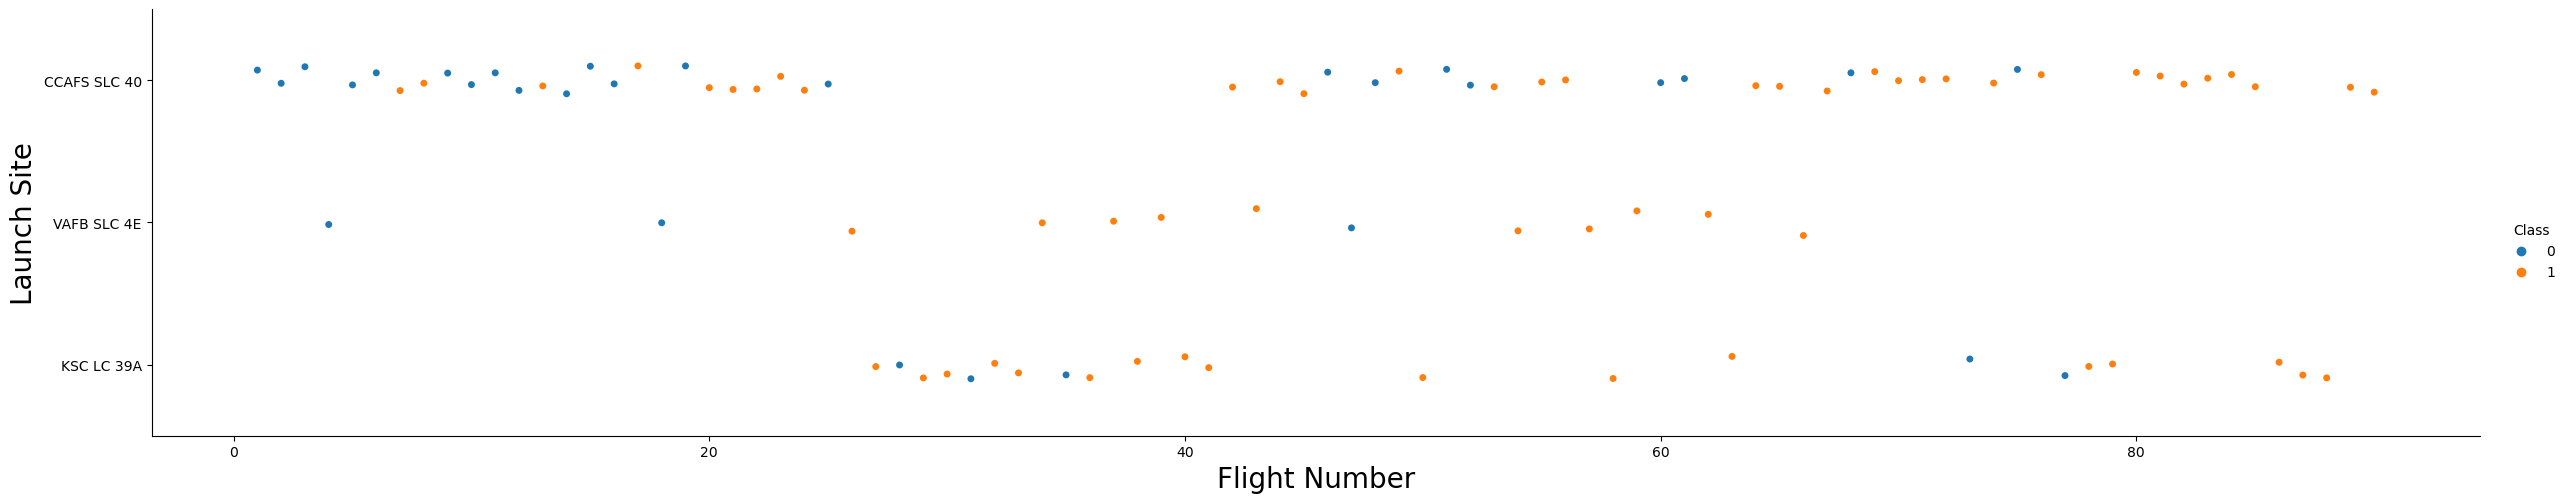

In [58]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Launch Site", fontsize=20)
plt.show()

* Launch Site Frequency: The y-axis represents the launch sites, so we can identify which launch sites were used more frequently by examining how many flight numbers are associated with each site.

* Success or Failure by Launch Site: The "Class" variable, indicated by different colors, likely represents whether a flight was successful or unsuccessful. By observing the color distribution at each launch site, you can infer the success rate of flights from different locations.

* Consistency in Launches: By viewing the spread of points on the x-axis (Flight Number), you can see if certain launch sites were consistently used during specific periods of the overall launch sequence.

* Site-Specific Patterns: If certain launch sites are associated with more successful or failed flights, it may indicate that specific sites are better suited for successful missions. For example, if a site predominantly has one color indicating success, it might be more reliable.

### Visualize the relationship between success rate of each orbit type

createing a `bar chart` for the sucess rate of each orbit

In [59]:
# check head of dataframe
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [60]:
# group df by Orbits and find the mean of Class column
df_groupby_orbits = df.groupby('Orbit').Class.mean()
df_groupby_orbits

Orbit
ES-L1    1.000000
GEO      1.000000
GTO      0.518519
HEO      1.000000
ISS      0.619048
LEO      0.714286
MEO      0.666667
PO       0.666667
SO       0.000000
SSO      1.000000
VLEO     0.857143
Name: Class, dtype: float64

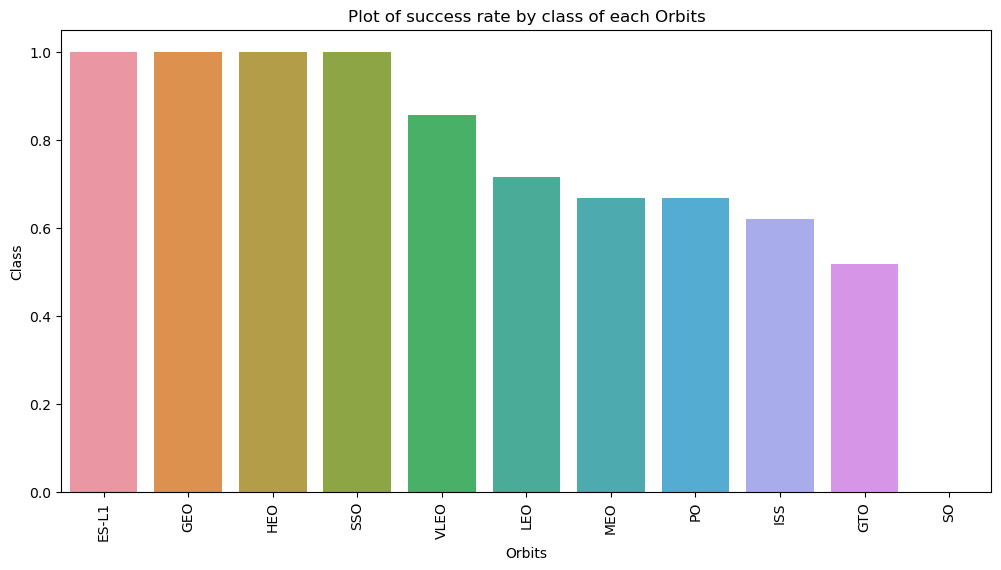

In [61]:
# Using groupby method on Orbit column and get the mean of Class column
grouped_orbits = df.groupby(by=['Orbit'])['Class'].mean().sort_values(ascending=False).reset_index()
fig, ax=plt.subplots(figsize=(12,6))
ax = sns.barplot(x = 'Orbit', y = 'Class', data=grouped_orbits)
ax.set_title('Plot of success rate by class of each Orbits', fontdict={'size':12})
ax.set_ylabel('Class', fontsize = 10)
ax.set_xlabel('Orbits', fontsize = 10)
ax.set_xticklabels(ax.get_xticklabels(), fontsize = 10, rotation=90);

Looking at the plot, we can see that `ES-L1`, `GEO`, `HEO`, `SSO`, and `VLEO` are the Orbits that have high success rate. 

The `SO` has the least success rate amongst the orbits.

### Visualize the relationship between FlightNumber and Orbit type

Checking if there is any relationship between FlightNumber and Orbit type.

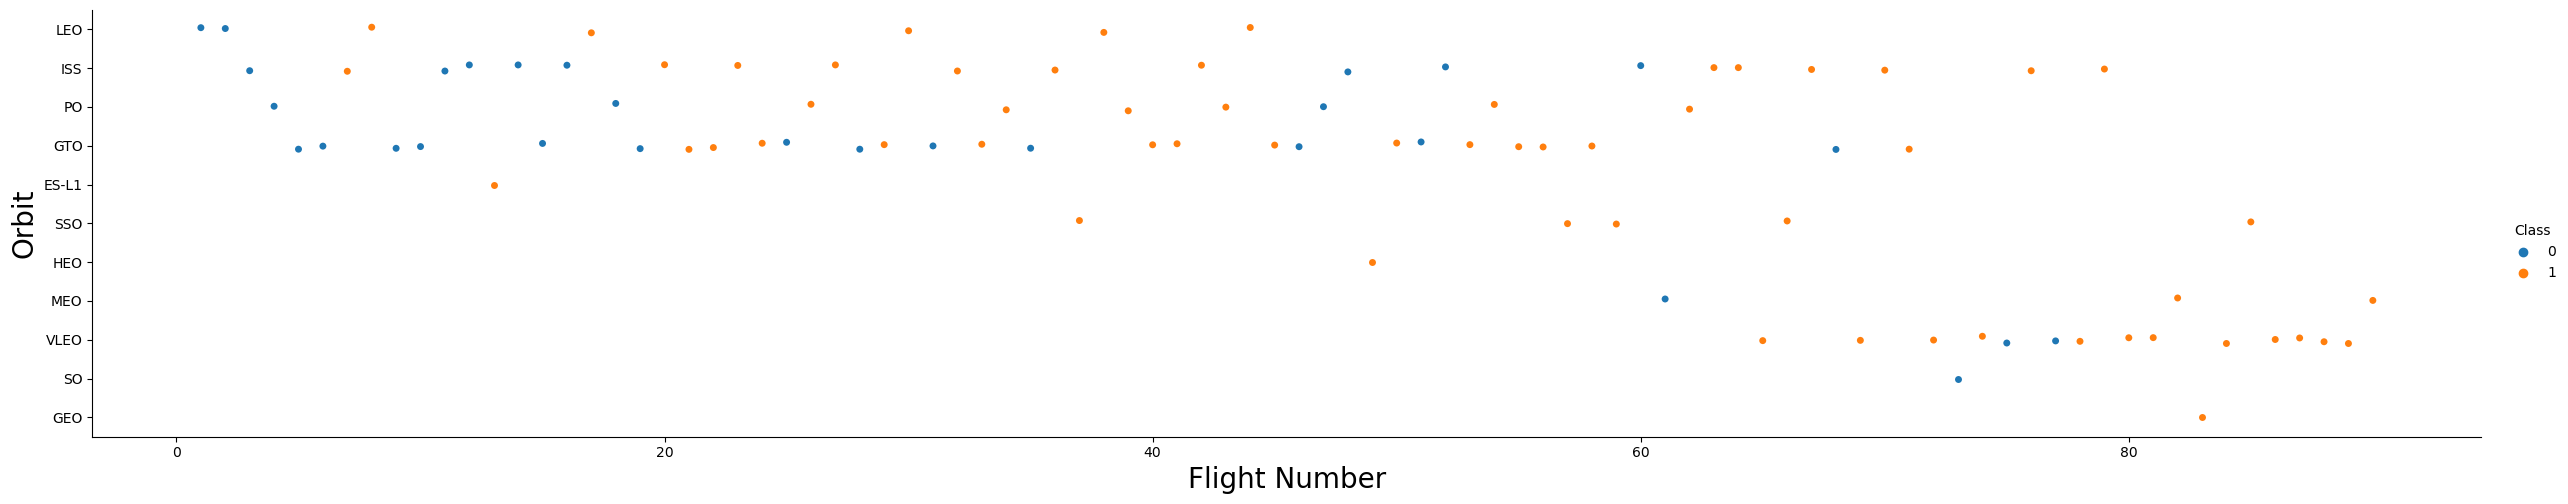

In [62]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value
sns.catplot(y="Orbit", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()

We can see that in the LEO orbit the Success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit.


### Visualize the relationship between Payload and Orbit type

we can plot the Payload vs. Orbit scatter point charts to reveal the relationship between Payload and Orbit type

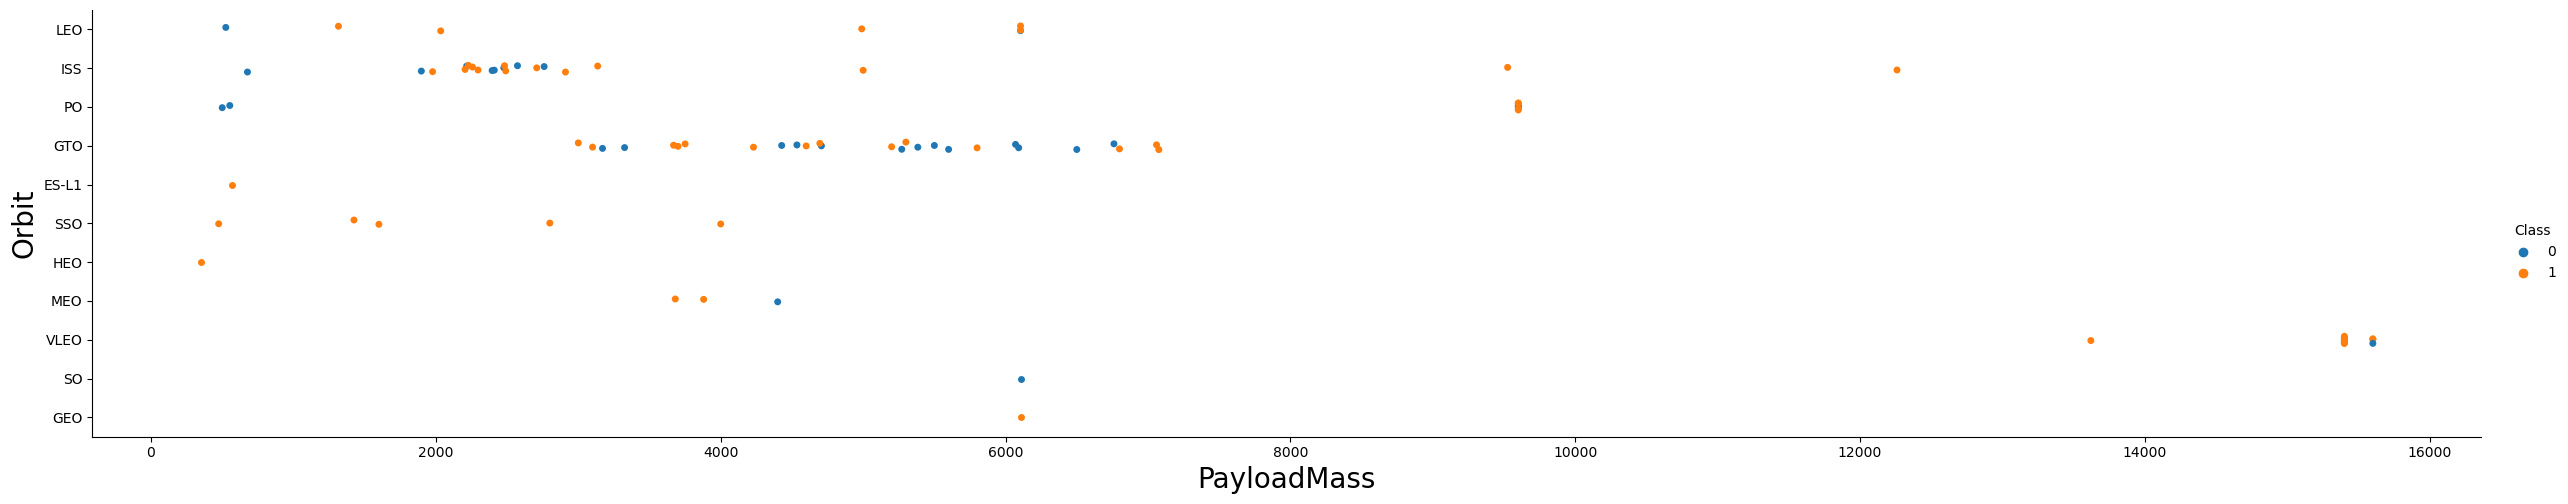

In [63]:
# Ploting a scatter point chart with x axis to be Payload and y axis to be the Orbit, and hue to be the class value
sns.catplot(y="Orbit", x="PayloadMass", hue="Class", data=df, aspect = 5)
plt.xlabel("PayloadMass",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()

With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.

However for GTO we cannot distinguish this well as both positive landing rate and negative landing(unsuccessful mission) are both there here.


### Visualize the launch success yearly trend

plot a line chart with x axis to be <code>Year</code> and y axis to be average success rate, to get the average launch success trend.

In [64]:
# A function to Extract years from the date 
year=[]
def Extract_year(date):
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year

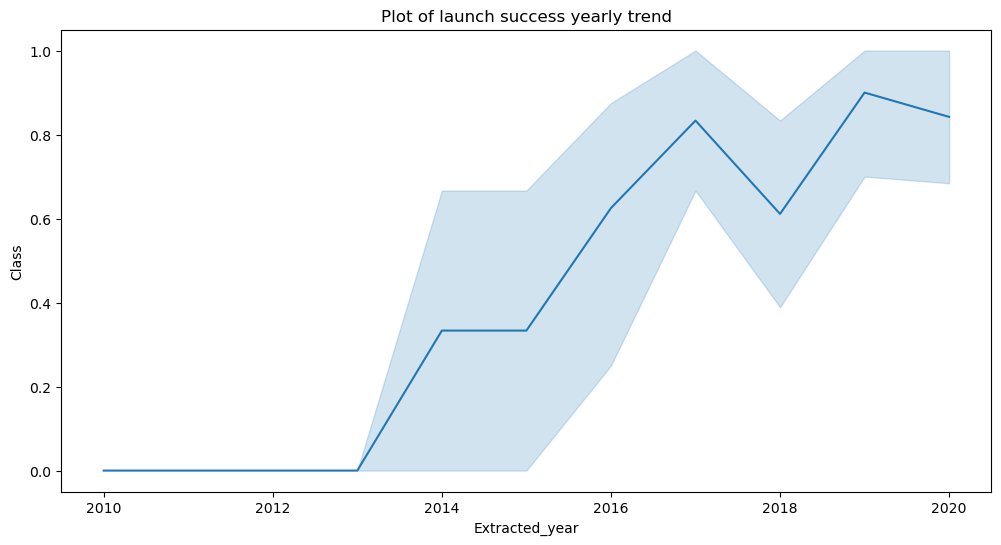

In [65]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate
df_copy = df.copy()
df_copy['Extracted_year'] = pd.DatetimeIndex(df['Date']).year

# plot line chart
fig, ax=plt.subplots(figsize=(12,6))
sns.lineplot(data=df_copy, x='Extracted_year', y='Class')
plt.title('Plot of launch success yearly trend');
plt.show()

you can observe that the sucess rate since 2013 kept increasing till 2020


## Features Engineering


By now, we have some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.

In [66]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


### Create dummy variables to categorical columns

Using the function <code>get_dummies</code> and <code>features</code> dataframe to apply OneHotEncoder to the column <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code>, and <code>Serial</code>. Assigning the value to the variable <code>features_one_hot</code>

In [67]:
#  dummy variables
features_one_hot = pd.get_dummies(features, drop_first=True)
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,Orbit_VLEO,LaunchSite_KSC LC 39A,LaunchSite_VAFB SLC 4E,LandingPad_5e9e3032383ecb554034e7c9,LandingPad_5e9e3032383ecb6bb234e7ca,LandingPad_5e9e3032383ecb761634e7cb,LandingPad_5e9e3033383ecbb9e534e7cc,Serial_B0005,Serial_B0007,Serial_B1003,Serial_B1004,Serial_B1005,Serial_B1006,Serial_B1007,Serial_B1008,Serial_B1010,Serial_B1011,Serial_B1012,Serial_B1013,Serial_B1015,Serial_B1016,Serial_B1017,Serial_B1018,Serial_B1019,Serial_B1020,Serial_B1021,Serial_B1022,Serial_B1023,Serial_B1025,Serial_B1026,Serial_B1028,Serial_B1029,Serial_B1030,Serial_B1031,Serial_B1032,Serial_B1034,Serial_B1035,Serial_B1036,Serial_B1037,Serial_B1038,Serial_B1039,Serial_B1040,Serial_B1041,Serial_B1042,Serial_B1043,Serial_B1044,Serial_B1045,Serial_B1046,Serial_B1047,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,525.000000,1,False,False,False,1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,677.000000,1,False,False,False,1.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,500.000000,1,False,False,False,1.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,3170.000000,1,False,False,False,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Cast all numeric columns to `float64`

<code>features_one_hot</code> dataframe only contains numbers cast the entire dataframe to variable type <code>float64</code>

In [68]:
features_one_hot =  features_one_hot.astype(float)
features_one_hot.dtypes

FlightNumber    float64
PayloadMass     float64
Flights         float64
GridFins        float64
Reused          float64
                 ...   
Serial_B1056    float64
Serial_B1058    float64
Serial_B1059    float64
Serial_B1060    float64
Serial_B1062    float64
Length: 76, dtype: object

In [69]:
# export csv
features_one_hot.to_csv('dataset_part_3.csv', index=False)

## Machine Learning Prediction

## Objectives

Perform exploratory  Data Analysis and determine Training Labels

*   create a column for the class
*   Standardize the data
*   Split into training data and test data

\-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

*   Find the method performs best using test data

In [70]:
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

function to plot the confusion matrix.

In [71]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed'])

Load the data


In [72]:
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")

# If you were unable to complete the previous lab correctly you can uncomment and load this csv

# data = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/dataset_part_2.csv')

data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [73]:
X = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv')

# If you were unable to complete the previous lab correctly you can uncomment and load this csv

# X = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/dataset_part_3.csv')

X.head(100)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,Orbit_VLEO,LaunchSite_CCAFS SLC 40,LaunchSite_KSC LC 39A,LaunchSite_VAFB SLC 4E,LandingPad_5e9e3032383ecb267a34e7c7,LandingPad_5e9e3032383ecb554034e7c9,LandingPad_5e9e3032383ecb6bb234e7ca,LandingPad_5e9e3032383ecb761634e7cb,LandingPad_5e9e3033383ecbb9e534e7cc,Serial_B0003,Serial_B0005,Serial_B0007,Serial_B1003,Serial_B1004,Serial_B1005,Serial_B1006,Serial_B1007,Serial_B1008,Serial_B1010,Serial_B1011,Serial_B1012,Serial_B1013,Serial_B1015,Serial_B1016,Serial_B1017,Serial_B1018,Serial_B1019,Serial_B1020,Serial_B1021,Serial_B1022,Serial_B1023,Serial_B1025,Serial_B1026,Serial_B1028,Serial_B1029,Serial_B1030,Serial_B1031,Serial_B1032,Serial_B1034,Serial_B1035,Serial_B1036,Serial_B1037,Serial_B1038,Serial_B1039,Serial_B1040,Serial_B1041,Serial_B1042,Serial_B1043,Serial_B1044,Serial_B1045,Serial_B1046,Serial_B1047,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
86,87.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
87,88.0,15400.000000,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.

## TASK  1


Creating a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).


In [74]:
# target data as numpy array
Y = data['Class'].to_numpy()
Y

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

## TASK  2


Standardizing the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.


In [75]:
# feature scaling

# applying standard scaler to features
transform = preprocessing.StandardScaler()
X = transform.fit_transform(X)

Split the data into training and testing data using the  function  <code>train_test_split</code>.   The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.


## TASK  3


Using train_test_split to split the data X and Y into training and test data. Set the parameter test_size to  0.2 and random_state to 2. The training data and test data should be assigned to the following labels.


In [76]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [77]:
Y_test.shape

(18,)

we only have 18 test samples.

## TASK  4


Creating a logistic regression object  then creating a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fiting the object to find the best parameters from the dictionary <code>parameters</code>.


### Logistic Regression

In [78]:
# define hyperparameters to tune 
parameters_lr ={"C":[0.01,0.1,1],
             'penalty':['l2'], 
             'solver':['lbfgs']}# l1 lasso l2 ridge

# define the model
lr = LogisticRegression(random_state = 12345)

# define the grid search object
grid_search_lr = GridSearchCV(
    estimator = lr,
    param_grid = parameters_lr,
    scoring = 'accuracy',
    cv = 10
)
# execute search
logreg_cv = grid_search_lr.fit(X_train,Y_train)

We output the <code>GridSearchCV</code> object for logistic regression. We display the best parameters using the data attribute <code>best_params\_</code> and the accuracy on the validation data using the data attribute <code>best_score\_</code>.

In [79]:
print("tuned hyperparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :", logreg_cv.best_score_)

tuned hyperparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8464285714285713


## TASK  5


Calculate the accuracy on the test data using the method <code>score</code>:


In [80]:
print('Accuracy on test data is: {:.3f}'.format(logreg_cv.score(X_test, Y_test)))

Accuracy on test data is: 0.833


Confusion matrix

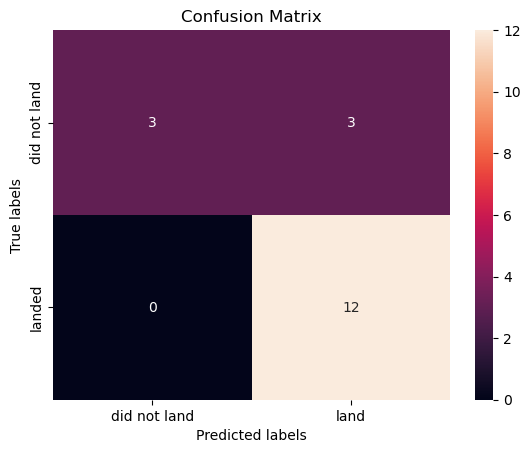

In [81]:
yhat_lr = logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat_lr)

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.  We see that the major problem is false positives.


## TASK  6


Creating a support vector machine object then  creating a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv - 10.  Fiting the object to find the best parameters from the dictionary <code>parameters</code>.

In [82]:
# define hyperparameters to tune 
parameters_svm = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}

# define the model
svm = SVC(random_state = 12345)

# define the grid search object
grid_search_svm = GridSearchCV(
    estimator = svm,
    param_grid = parameters_svm,
    scoring = 'accuracy',
    cv = 10
)
# execute search
svm_cv = grid_search_svm.fit(X_train,Y_train)

In [83]:
print("tuned hyperparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hyperparameters :(best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
accuracy : 0.8482142857142856


## TASK  7


Calculate the accuracy on the test data using the method <code>score</code>:


In [85]:
print('Accuracy on test data is: {:.3f}'.format(svm_cv.score(X_test, Y_test)))

Accuracy on test data is: 0.833


Confusion matrix

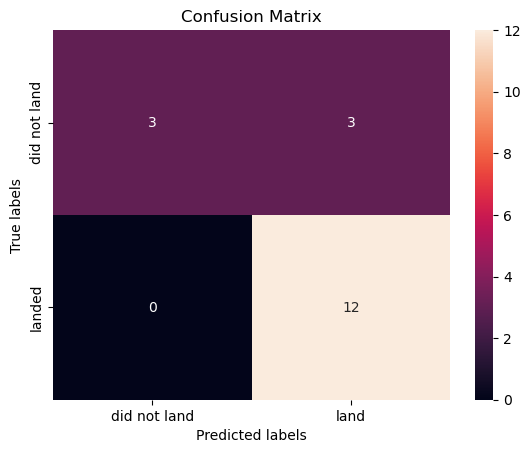

In [87]:
yhat_svm = svm_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat_svm)

## TASK  8

Creating a decision tree classifier object then  creating a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fiting the object to find the best parameters from the dictionary <code>parameters</code>.


In [89]:
# define hyperparameters to tune 
parameters_tree = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

# define the model
tree = DecisionTreeClassifier(random_state = 12345)

# define the grid search object
grid_search_tree = GridSearchCV(
    estimator = tree,
    param_grid = parameters_tree,
    scoring = 'accuracy',
    cv = 10
)
# execute search
tree_cv = grid_search_tree.fit(X_train, Y_train)

c:\Users\LEGION\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\LEGION\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\LEGION\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\LEGION\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\U

In [90]:
print("tuned hyperparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hyperparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 6, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 5, 'splitter': 'random'}
accuracy : 0.8732142857142856


## TASK  9


Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


In [92]:
print('Accuracy on test data is: {:.3f}'.format(tree_cv.score(X_test, Y_test)))

Accuracy on test data is: 0.833


Confusion matrix

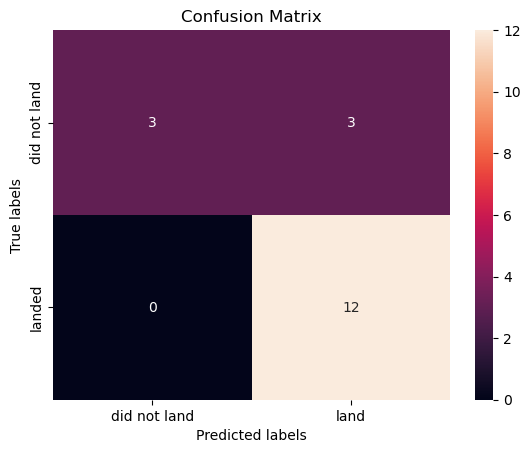

In [93]:
yhat_tree = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat_tree)

## TASK  10


Creating a k nearest neighbors object then  creating a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [94]:
# define hyperparameters to tune
parameters_knn = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

# define the model
knn = KNeighborsClassifier()

# define the grid search object
grid_search_knn = GridSearchCV(
    estimator = knn,
    param_grid = parameters_knn,
    scoring = 'accuracy',
    cv = 10
)
# execute search
knn_cv = grid_search_knn.fit(X_train, Y_train)

In [95]:
print("tuned hyperparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hyperparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
accuracy : 0.8482142857142858


## TASK  11


Calculate the accuracy of knn_cv on the test data using the method <code>score</code>:


In [96]:
print('Accuracy on test data is: {:.3f}'.format(knn_cv.score(X_test, Y_test)))

Accuracy on test data is: 0.833


Confusion matrix

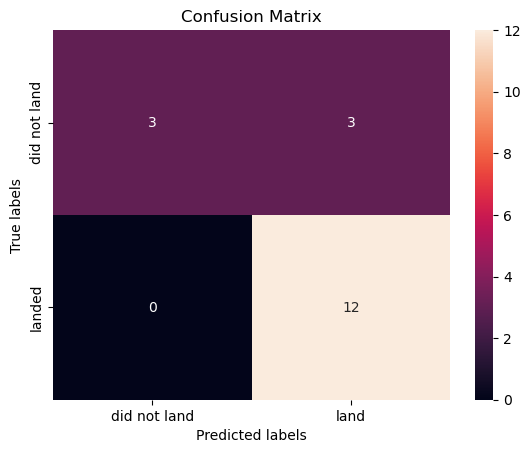

In [97]:
yhat_knn = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat_knn)

## TASK  12


Find the method performs best:


In [98]:
models = {'KNeighbors':knn_cv.best_score_,
              'DecisionTree':tree_cv.best_score_,
              'LogisticRegression':logreg_cv.best_score_,
              'SupportVector': svm_cv.best_score_}

bestalgorithm = max(models, key=models.get)
print('Best model is', bestalgorithm,'with a score of', models[bestalgorithm])
if bestalgorithm == 'DecisionTree':
    print('Best params is :', tree_cv.best_params_)
if bestalgorithm == 'KNeighbors':
    print('Best params is :', knn_cv.best_params_)
if bestalgorithm == 'LogisticRegression':
    print('Best params is :', logreg_cv.best_params_)
if bestalgorithm == 'SupportVector':
    print('Best params is :', svm_cv.best_params_)

Best model is DecisionTree with a score of 0.8732142857142856
Best params is : {'criterion': 'gini', 'max_depth': 6, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 5, 'splitter': 'random'}
